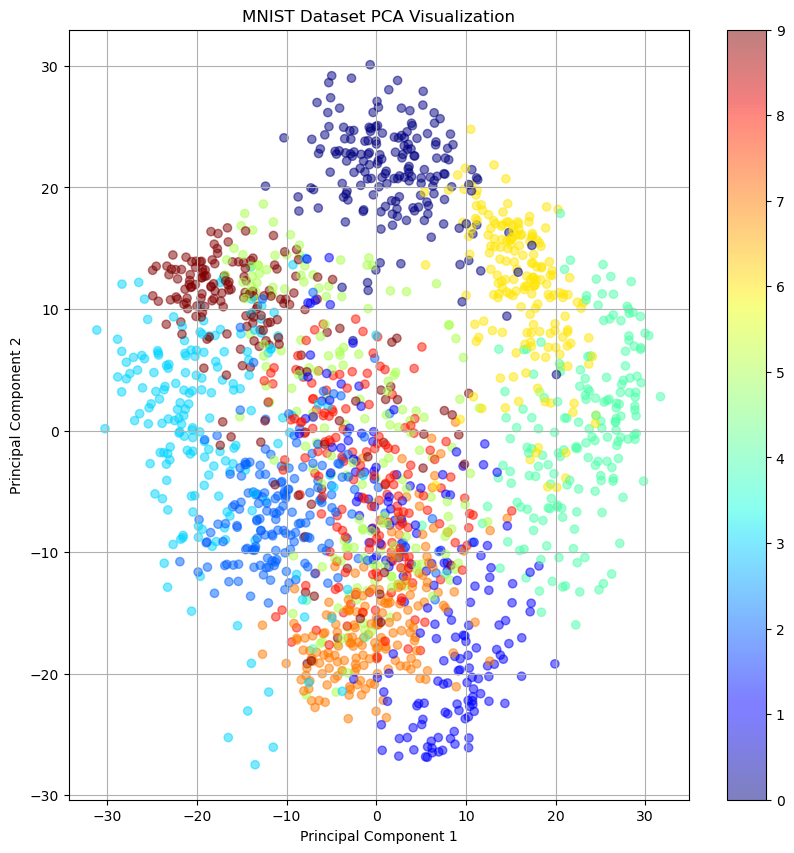

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

digits = datasets.load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)  # 2つの主成分を保持
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='jet', alpha=0.5)

plt.colorbar(scatter)
plt.title('MNIST Dataset PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [1]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

mnist_data = MNIST('~/tmp/mnist', train=True, download=True, transform=transforms.ToTensor())
data_loader = DataLoader(mnist_data,batch_size=4,shuffle=False)
data_iter = iter(data_loader)
images, labels = data_iter.next()
npimg = images[0].numpy()
npimg = npimg.reshape((28, 28))
plt.imshow(npimg, cmap='gray')
plt.show()

100%|██████████| 9912422/9912422 [00:00<00:00, 112061193.24it/s]


Extracting /home/hirahara/tmp/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /home/hirahara/tmp/mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 326511304.11it/s]


Extracting /home/hirahara/tmp/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /home/hirahara/tmp/mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 105670018.89it/s]


Extracting /home/hirahara/tmp/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/hirahara/tmp/mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 56698002.29it/s]

Extracting /home/hirahara/tmp/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/hirahara/tmp/mnist/MNIST/raw



AttributeError: '_SingleProcessDataLoaderIter' object has no attribute 'next'

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# データの変換を定義する
transform = transforms.Compose([
    transforms.Resize((299, 299)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 画像データセットをロードする
dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)  # 100枚の画像を使用

# Inception-v3モデルをロードする
model = torchvision.models.inception_v3(pretrained=True)
# model.fc = torch.nn.Identity()  # 特徴量を直接抽出するための変更

# 画像から特徴量を抽出
features, labels = [], []
with torch.no_grad():
    for images, lbls in dataloader:
        features.append(model(images).logits)
        labels.append(lbls)
        break  # 1バッチのみ処理

features = torch.cat(features).numpy()
labels = torch.cat(labels).numpy()

# 特徴量の標準化
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# PCAの実行
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# プロット
plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='jet', alpha=0.5)
plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.grid(True)
plt.show()


Files already downloaded and verified


/home/hirahara/anaconda3/envs/aiaug/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hirahara/anaconda3/envs/aiaug/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


TypeError: expected Tensor as element 0 in argument 0, but got InceptionOutputs

(100, 4)


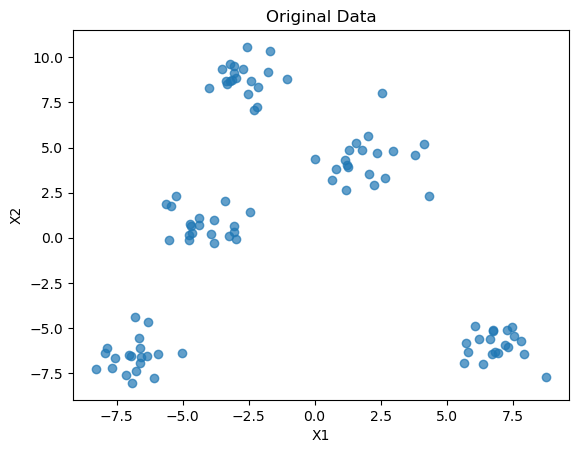

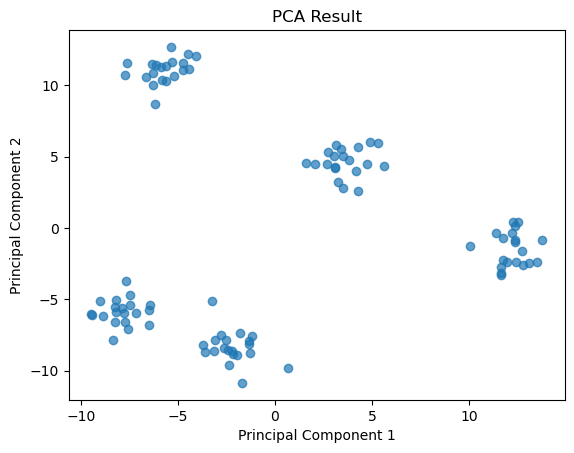

Explained variance ratio: [0.41170862 0.39370545]
Cumulative explained variance ratio: [0.41170862 0.80541407]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# ダミーデータを生成（2次元）
X, _ = make_blobs(n_samples=100, centers=5, n_features=4, random_state=42)
print(X.shape)

# データをプロット
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title('Original Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# PCAを適用（主成分を2つまで）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 主成分分析後のデータをプロット
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 寄与率と累積寄与率を表示
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', np.cumsum(pca.explained_variance_ratio_))
